In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Image1=cv2.imread('Dog_Backpack.jpg')
Image1=cv2.cvtColor(Image1,cv2.COLOR_BGR2RGB)
Image2=cv2.imread('Watermark_No_Copy.png')
Image2=cv2.cvtColor(Image2,cv2.COLOR_BGR2RGB)

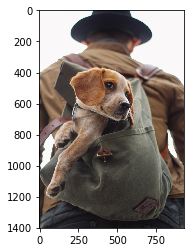

In [3]:
plt.imshow(Image1)

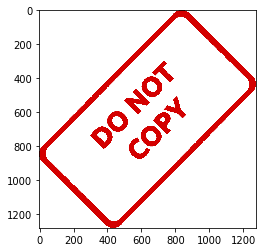

In [4]:
plt.imshow(Image2)

In [5]:
Image1.shape
# For Image:
# 1401:Y Axis,934:X Axis
# For Numpy:
# 1401:X Axis,934:Y Axis

(1401, 934, 3)

In [6]:
Image2.shape

(1280, 1277, 3)

In [7]:
# BLENDING IMAGES OF SAME SIZE:
Image1=cv2.resize(Image1,(1200,1200))
Image2=cv2.resize(Image2,(1200,1200))

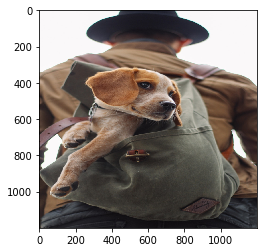

In [8]:
plt.imshow(Image1)

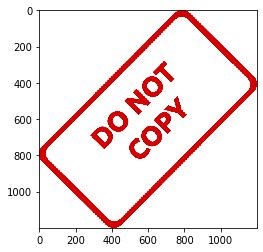

In [9]:
plt.imshow(Image2)

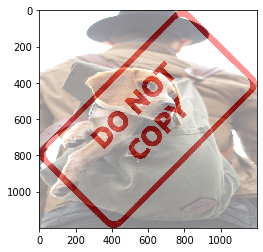

In [10]:
# addWeighted: Works on the Images of Same Size
Blended=cv2.addWeighted(src1=Image1,alpha=0.6,src2=Image2,beta=0.5,gamma=0)
plt.imshow(Blended)

In [11]:
# OVERLAY SMALL IMAGE ON THE LARGE IMAGE(NO BLENDING):
# NUMPY ASSIGNMENT
Image3=cv2.imread('Dog_Backpack.jpg')
Image3=cv2.cvtColor(Image3,cv2.COLOR_BGR2RGB)
Image4=cv2.imread('Watermark_No_Copy.png')
Image4=cv2.cvtColor(Image4,cv2.COLOR_BGR2RGB)

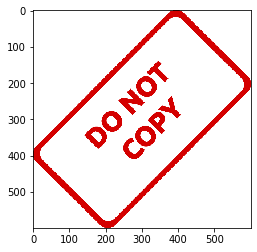

In [12]:
Image4=cv2.resize(Image4,(600,600))
plt.imshow(Image4)

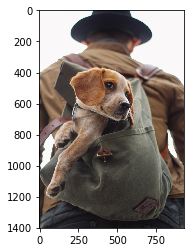

In [13]:
plt.imshow(Image3)

In [14]:
Large_Image=Image3
Small_Image=Image4
x_Offset=0
y_Offset=0

In [15]:
x_End=x_Offset+Small_Image.shape[0]
y_End=y_Offset+Small_Image.shape[1]

In [16]:
Small_Image.shape[0]

600

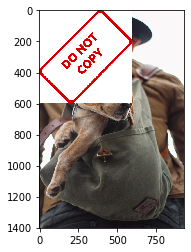

In [17]:
# Taking the Chunk of Larger Image and Replacing with a Smaller Image
Large_Image[y_Offset:y_End,x_Offset:x_End]=Small_Image
plt.imshow(Large_Image)

In [18]:
# BLEND TOGETHER IMAGES OF DIFFERENT SIZES:
Image5=cv2.imread('Dog_Backpack.jpg')
Image5=cv2.cvtColor(Image5,cv2.COLOR_BGR2RGB)
Image6=cv2.imread('Watermark_No_Copy.png')
Image6=cv2.cvtColor(Image6,cv2.COLOR_BGR2RGB)

In [19]:
Image6=cv2.resize(Image6,(600,600))

In [20]:
Image6.shape

(600, 600, 3)

In [21]:
Image5.shape

(1401, 934, 3)

In [22]:
X_OFFSET=934-600
Y_OFFSET=1401-600

In [23]:
Rows,Columns,Channels=Image6.shape

In [24]:
Rows

600

In [25]:
Columns

600

In [26]:
Channels

3

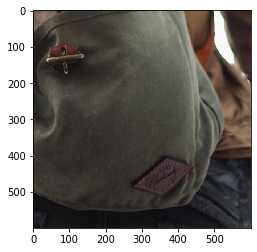

In [27]:
# ROI:Region Of Interest
# Image[0:Rows,0:Columns]
ROI=Image5[Y_OFFSET:1401,X_OFFSET:934]
plt.imshow(ROI)

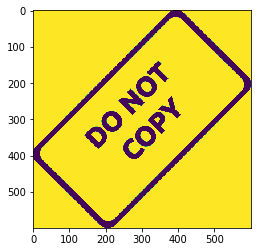

In [28]:
# MASK:
Image7=cv2.cvtColor(Image6,cv2.COLOR_RGB2GRAY)
plt.imshow(Image7)

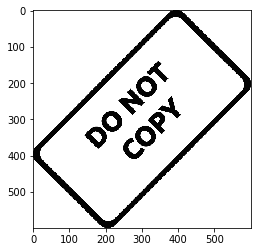

In [29]:
plt.imshow(Image7,cmap='gray')

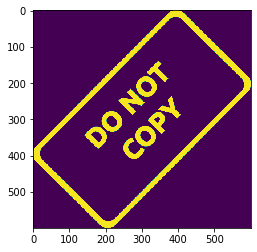

In [30]:
Image7_Inverse=cv2.bitwise_not(Image7)
plt.imshow(Image7_Inverse)

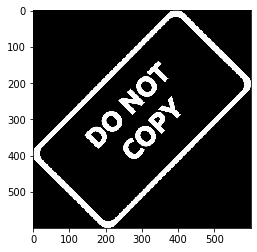

In [31]:
plt.imshow(Image7_Inverse,cmap='gray')

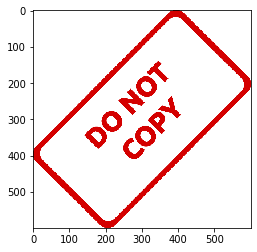

In [32]:
plt.imshow(Image6)

In [33]:
Image7_Inverse.shape

(600, 600)

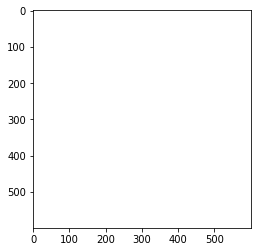

In [34]:
White_Background=np.full(Image6.shape,255,dtype=np.uint8)
plt.imshow(White_Background)

In [35]:
White_Background.shape

(600, 600, 3)

In [36]:
# bitwise_or:Disjunction of Two Arrays
Background=cv2.bitwise_or(White_Background,White_Background,mask=Image7_Inverse)

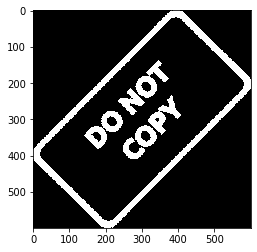

In [37]:
plt.imshow(Background)

In [38]:
Background.shape

(600, 600, 3)

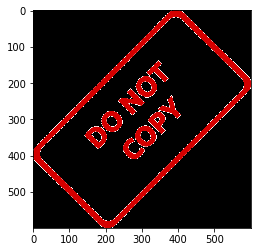

In [39]:
Foreground=cv2.bitwise_or(Image6,Image6,mask=Image7_Inverse)
plt.imshow(Foreground)

In [40]:
Foreground.shape

(600, 600, 3)

In [41]:
Image7_Inverse.shape

(600, 600)

In [42]:
Image6.shape

(600, 600, 3)

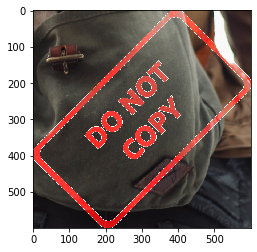

In [43]:
Final_ROI=cv2.bitwise_or(ROI,Foreground)
plt.imshow(Final_ROI)

In [44]:
Large_Image=Image5
Small_Image=Final_ROI

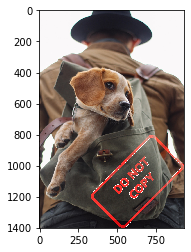

In [45]:
Large_Image[Y_OFFSET:Y_OFFSET+Small_Image.shape[0],X_OFFSET:X_OFFSET+Small_Image.shape[1]]=Small_Image
plt.imshow(Large_Image)